<a href="https://colab.research.google.com/github/drizzletechnova/Coursera-data-science-/blob/main/regularization_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error,r2_score

import seaborn as sns

In [ ]:
X,y = datasets.make_regression(n_samples = 10000, n_features = 40, noise = 10, random_state = 443)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 443, test_size = 0.2)

In [ ]:
X_train.shape

(8000, 40)

# Linear regression

In [ ]:
class LinearRegression():
    def __init__(self,lr = 0.01, epochs = 1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self,X,y):
        n,n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.epochs):
            y_pred = np.dot(X,self.weights) + self.bias
            dw = (1/n) * np.dot(X.T,( y_pred - y))
            db =( 1/n) * np.sum( y_pred - y)
            self.weights -= dw * self.lr
            self.bias -= db * self.lr

    def predict(self,X):
        y_pred = np.dot(X,self.weights) + self.bias
        return y_pred

In [ ]:
lr = LinearRegression(lr = 0.001)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

5224.475550665254

In [ ]:
r2_score(y_test, y_pred)

0.8565556591600293

In [ ]:
def mse(y,y_pred):
    return np.mean((y - y_pred) ** 2)

In [ ]:
mse(y_test,y_pred)

5224.475550665254

<Axes: >

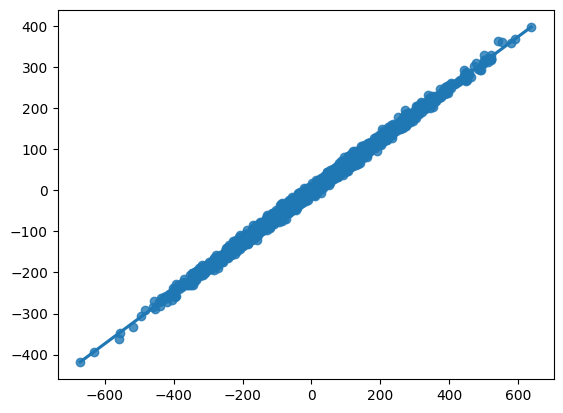

In [ ]:
sns.regplot(x= y_test,y = y_pred)

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Load the dataset
california = fetch_california_housing()
X2, y2 = california.data, california.target

# Split the dataset into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
# Initialize and train the model
model = LinearRegression()
model.fit(X2_train, y2_train)

# Make predictions
y2_pred = model.predict(X2_test)

# Evaluate the model
mse = mean_squared_error(y2_test, y2_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.5558915986952422


In [ ]:
r2_score(y2_test, y2_pred)

0.5757877060324524

<Axes: >

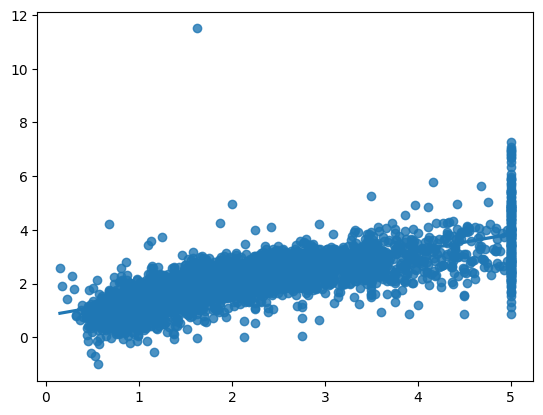

In [ ]:
sns.regplot(x= y2_test,y = y2_pred)

# L2 Regularization

In [ ]:
class Ridge():
    def __init__(self,epochs = 1000,lr = 0.01,alpha = 0.01):
        self.bias = None
        self.weights = None
        self.lr = lr
        self.alpha = alpha
        self.epochs = epochs
    def fit(self,X,y):
        m,n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.epochs):
            y_pred = np.dot(X,self.weights) + self.bias
            dw = 1/m * np.dot(X.T,(y - y_pred)) + self.alpha * self.weights
            db = 1/m * np.sum(y - y_pred)
            self.weights -= dw * self.lr
            self.bias -= db * self.lr

    def predict(self,X):
        return np.dot(X,self.weights) + self.bias

In [ ]:
model2 = Ridge(lr = 0.001,alpha = 0.1)
model2.fit(X_train,y_train)
y3_pred = model2.predict(X_test)

In [ ]:
r2_score(y_test, y3_pred)

-5.6825539114099275

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y3_pred)

243389.45211587727

# L1 Regularization

In [ ]:
class Lasso():
    def __init__(self,epochs = 1000,lr = 0.01,alpha = 0.01):
        self.bias = None
        self.weights = None
        self.lr = lr
        self.alpha = alpha
        self.epochs = epochs
    def fit(self,X,y):
        m,n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.epochs):
            y_pred = np.dot(X,self.weights) + self.bias
            dw = 1/m * np.dot(X.T,(y - y_pred)) + (self.alpha * np.sign(self.weights))
            db = 1/m * np.sum(y - y_pred)
            self.weights -= dw * self.lr
            self.bias -= db * self.lr

    def predict(self,X):
        return np.dot(X,self.weights) + self.bias

In [ ]:
model3 =  Lasso(lr = 0.001)
model3.fit(X_train,y_train)
y4_pred = model3.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y4_pred)

261384.5616926899

In [ ]:
r2_score(y_test, y4_pred)

-6.176631566967191